# Part 1
# Step 1
The part 1 step 1 scraps the data of the table from the spaceweather website with the help of Beautiful Soup library. After scrapping the data, the region is four digit hence I added leading 0s and created the dataframe with the help of pandas. I even got rid of '+' and made '20' to '20.0' for consistency in the data with lambda equations

In [1]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urlparse
import pandas as pd
import lxml
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
r = requests.get('https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares.html', headers=headers)

In [3]:
root = BeautifulSoup(r.content, 'lxml')

In [4]:
content = root.find("div", {"class": "col-md-8"}).find('table').prettify()

In [5]:
table = pd.read_html(content)

In [6]:
df = table[0]
df.columns = ['rank', 'x_classification', 'date', 'region', 'start_time', 'maximum_time', 'end_time', 'movie']
df = df.set_index([pd.Index(range(1,51))])
df['region'] = df['region'].apply(lambda x: '{0:0>4}'.format(x) if len(str(x)) < 4 else str(x))
df['x_classification'] = df['x_classification'].apply(lambda x: x[0]+str(float(x[1:-1])) if '+' in x else x)
df['x_classification'] = df['x_classification'].apply(lambda x: x[0]+str(float(x[1:])))

In [7]:
(r,c) = df.shape
print("Dimension: %d x %d" %(r,c))
df

Dimension: 50 x 8


,rank,x_classification,date,region,start_time,maximum_time,end_time,movie
1,1,X28.0,2003/11/04,0486,19:29,19:53,20:06,Movie View archive
2,2,X20.0,2001/04/02,9393,21:32,21:51,22:03,Movie View archive
3,3,X17.2,2003/10/28,0486,09:51,11:10,11:24,Movie View archive
4,4,X17.0,2005/09/07,0808,17:17,17:40,18:03,Movie View archive
5,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,Movie View archive
6,6,X10.0,2003/10/29,0486,20:37,20:49,21:01,Movie View archive
7,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,Movie View archive
8,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,Movie View archive
9,9,X9.0,2006/12/05,0930,10:18,10:35,10:45,Movie View archive
10,10,X8.3,2003/11/02,0486,17:03,17:25,17:39,Movie View archive


# Step 2
Step 2 of the project was to combine date and time of the events and dropping certain columns in the dataframe. With the help of pandas to_datetime() function created a datetime object and stored it with the help of .at[] on dataframe. I also renamed the columns name with the rename() function and dropped the unecessary columns.

In [8]:
# iterate over each row of the dataframe
for index, row in df.iterrows():
    # create the datetime objects
    row['start_time'] = pd.to_datetime(row['date'] + ' ' + row['start_time'])
    row['maximum_time'] = pd.to_datetime(row['date'] + ' ' + row['maximum_time'])
    row['end_time'] = pd.to_datetime(row['date'] + ' ' + row['end_time'])
    df.at[index,'start_time'] = row['start_time']
    df.at[index,'maximum_time'] = row['maximum_time']
    df.at[index,'end_time'] = row['end_time']

# replace the '-' with NaN
df['region'] = df['region'].apply(lambda x: np.nan if x == '-' else x)


df['temp'] = df['region'] 
df['region'] = df['movie']
df['movie'] = df['temp']

# renaming the columns
df = df.rename(columns={'start_time':"start_datetime",'end_time':"end_datetime",'maximum_time':"maximum_datetime", "x_classification":'x_class','temp':'region', 'region':'movie'})

# droping columns
df = df.drop('movie', 1)
df = df.drop('date',1)

In [9]:
(r,c) = df.shape
print("A dataframe: %d x %d" %(r,c))
df

A dataframe: 50 x 6


,rank,x_class,start_datetime,maximum_datetime,end_datetime,region
1,1,X28.0,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,0486
2,2,X20.0,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
3,3,X17.2,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,0486
4,4,X17.0,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,0808
5,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
6,6,X10.0,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,0486
7,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
8,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
9,9,X9.0,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,0930
10,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,0486


# Step 3
In Step 3 I scrapped information from the NASA pre tag and got rid of various html tags such as anchor tag and split the each line based of space and created rows and column of the dataframe. I even dropped of various columns and renamed the columns for better understanding.

In [10]:
r = requests.get('https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html')
root = BeautifulSoup(r.content, 'lxml')
pre = root.find('pre').prettify()
result = []

# split the information based '\n' or newline
for each in pre.split('\n')[1:-1]:

    # split based on spaces
    if each != "" and each[0].isnumeric():
        # got rid of <a href..> and unecessary spaces
        each = re.sub('<.*?>','',each)
        row = re.split('\s+', each)
        result.append(row)
        
# created the dataframe 
nasa_df = pd.DataFrame(result)

In [11]:
# delected the unecessary columns
nasa_df = nasa_df.drop([15,16,17,18,19,20,21,22,23],axis=1)

In [12]:
nasa_df.columns = ['start_date', 'start_time', 'end_date', 'end_time', 'start_frequency', 'end_frequency', 'flare_location', 'flare_region','flare_classification', 'cme_date', 'cme_time', 'cme_angle', 'cme_width', 'cme_speed','plot']

In [13]:
pd.set_option('display.max_rows', 550)
(r,c) = nasa_df.shape
print("A dataframe: %d x %d" %(r,c))
nasa_df

A dataframe: 518 x 15


,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed,plot
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,PHTX
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878,PHTX
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464,PHTX
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,PHTX
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,PHTX
5,1997/11/03,05:15,11/03,12:00,14000,250,S20W13,8100,C8.6,11/03,05:28,240,109,227,PHTX
6,1997/11/03,10:30,11/03,11:30,14000,5000,S16W21,8100,M4.2,11/03,11:11,233,122,352,PHTX
7,1997/11/04,06:00,11/05,04:30,14000,100,S14W33,8100,X2.1,11/04,06:10,Halo,360,785,PHTX
8,1997/11/06,12:20,11/07,08:30,14000,100,S18W63,8100,X9.4,11/06,12:10,Halo,360,1556,PHTX
9,1997/11/27,13:30,11/27,14:00,14000,7000,N17E63,8113,X2.6,11/27,13:56,98,91,441,PHTX


# Step 4
In Step 4 I cleaned up the dataframe with applymap() function which iterates over all the cells of the dataframe and checks for '--', '????' and other fields which determine that the information is incomplete or missing with NaN. The Dataframe is also used for detectign whether there was a halo by creating a new column is_Halo. It even checks for greater than signa and removes it while setting the width_lower_bound to be set to true. It also just extracts the number from the cme_angle and removes any alphabets. It even combines the date and time into a single datetime object and drops the other columns. It renames the columns for better understanding of the dataframe.

In [14]:
def remove_missingentries(entry):
    
    if "--" in entry:
        re.sub("-.*-","", entry)
        entry = np.nan

    elif "????" in entry:
        entry = np.nan
    
    elif "BACK" == entry:
        entry = np.nan
    
    return entry
        
new_nasa_df = nasa_df.applymap(remove_missingentries)
new_nasa_df['is_halo'] = new_nasa_df['cme_angle'].apply(lambda x: True if x == 'Halo' else False)
new_nasa_df['cme_angle'] = new_nasa_df['cme_angle'].apply(lambda x: pd.NA if x == 'Halo' else x)
new_nasa_df['width_lower_bound'] = new_nasa_df['cme_width'].apply(lambda x: True if '&gt;' in str(x) else False)
new_nasa_df['cme_width'] = new_nasa_df['cme_width'].apply(lambda x: re.sub('&gt;','',str(x)) if '&gt;' in str(x) else x)
new_nasa_df['cme_width'] = new_nasa_df['cme_width'].apply(lambda x: re.sub('h','',str(x)) if 'h' in str(x) else x)
new_nasa_df['flare_classification'] = new_nasa_df['flare_classification'].apply(lambda x: x[0]+str(float(x[1:])) if str(x) != str(np.nan) and str(x) != 'FILA' else x)

# new_nasa_df

# Add date and time

for index, row in new_nasa_df.iterrows():

    year = str(row['start_date'])[:4]

    if str(row['start_date']) != 'nan' and str(row['start_time']) != "nan" and row['start_time'] == "24:00":
        new_nasa_df.at[index,'start_time'] = pd.to_datetime(row['start_date'] + ' ' + '00:00')
    elif str(row['start_date']) != 'nan' and str(row['start_time']) != "nan":
        new_nasa_df.at[index,'start_time'] = pd.to_datetime(row['start_date'] + ' ' + row['start_time'])
    
    if str(row['end_date']) != 'nan' and str(row['end_time']) != "nan" and row['end_time'] == "24:00":
        new_nasa_df.at[index ,'end_time'] = pd.to_datetime(year + '/' + row['end_date'] + ' ' + '00:00')
    elif str(row['end_date']) != 'nan' and str(row['end_time']) != "nan":
        new_nasa_df.at[index ,'end_time'] = pd.to_datetime(year + '/' + row['end_date'] + ' ' + row['end_time'])
        
    if str(row['cme_date']) != 'nan' and str(row['cme_time']) != "nan" and row['cme_time'] == "24:00":
        new_nasa_df.at[index,'cme_time'] = pd.to_datetime(year + '/' + row['cme_date'] + ' ' + '00:00')
    elif str(row['cme_date']) != 'nan' and str(row['cme_time']) != "nan":
        new_nasa_df.at[index,'cme_time'] = pd.to_datetime(year + '/' + row['cme_date'] + ' ' + str(row['cme_time']))


new_nasa_df = new_nasa_df.drop(['start_date','cme_date','end_date'],1)
new_nasa_df = new_nasa_df.rename(columns={'start_time':"start_datetime",'end_time':"end_datetime",'cme_time':"cme_datetime",'cme_angle':"cpa"
,'cme_width':"width",'cme_speed':"speed"})



In [15]:
new_nasa_df

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cpa,width,speed,plot,is_halo,width_lower_bound
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,PHTX,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,<NA>,360,878,PHTX,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,<NA>,360,464,PHTX,True,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,PHTX,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,PHTX,False,False
5,1997-11-03 05:15:00,1997-11-03 12:00:00,14000,250,S20W13,8100,C8.6,1997-11-03 05:28:00,240,109,227,PHTX,False,False
6,1997-11-03 10:30:00,1997-11-03 11:30:00,14000,5000,S16W21,8100,M4.2,1997-11-03 11:11:00,233,122,352,PHTX,False,False
7,1997-11-04 06:00:00,1997-11-05 04:30:00,14000,100,S14W33,8100,X2.1,1997-11-04 06:10:00,<NA>,360,785,PHTX,True,False
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,<NA>,360,1556,PHTX,True,False
9,1997-11-27 13:30:00,1997-11-27 14:00:00,14000,7000,N17E63,8113,X2.6,1997-11-27 13:56:00,98,91,441,PHTX,False,False


# Part 2

# Question 1
In this part I give priority to specific alphabets such as 'X' gets 400 added to its actual float magnitude. This helped me arange the data based according to X followed by M, C and B. I also priortize based of the dates since the importance of when they occured and displayed the top 50. There were alot of similarity between the datasets. They were minute difference in time or sometimes value of the flare classification however many simalarity.

In [16]:

def sort_class(element):
    if str(element) == 'nan':
        return -99
    elif 'X' in element:
        return 400 + float(element[1:])
    elif 'M' in element:
        return 300 + float(element[1:])
    elif 'C' in element:
        return 200 + float(element[1:])
    elif 'B' in element:
        return 100 + float(element[1:])
    
    return 0

new_nasa_df['top'] = new_nasa_df['flare_classification'].apply(sort_class)
new_nasa_df.sort_values(by='top', axis = 0, inplace=True, ascending=False, na_position ='last')
nasa_50 = new_nasa_df.drop('top',1).set_index(np.arange(1,len(new_nasa_df)+1))

In [17]:
nasa_50 = nasa_50[:50]
nasa_50

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cpa,width,speed,plot,is_halo,width_lower_bound
1,2003-11-04 20:00:00,2003-11-04 00:00:00,10000,200,S19W83,10486,X28.0,2003-11-04 19:54:00,<NA>,360,2657,PHTX,True,False
2,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.0,2001-04-02 22:06:00,261,244,2505,PHTX,False,False
3,2003-10-28 11:10:00,2003-10-29 00:00:00,14000,40,S16E08,10486,X17.0,2003-10-28 11:30:00,<NA>,360,2459,PHTX,True,False
4,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.0,2001-04-15 14:06:00,245,167,1199,PHTX,False,False
5,2003-10-29 20:55:00,2003-10-29 00:00:00,11000,500,S15W02,10486,X10.0,2003-10-29 20:54:00,<NA>,360,2029,PHTX,True,False
6,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,<NA>,360,1556,PHTX,True,False
7,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,<NA>,360,1571,PHTX,True,False
8,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaN,NaN,NaN,NaN,PHTX,False,False
9,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,X8.3,2017-09-10 16:00:00,<NA>,360,3163,PHTX,True,False
10,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,<NA>,360,2598,PHTX,True,False


# Question 2
I compared the datasets based of flare classification and year of occurance to determine the simialrity. The rank is stored in the 1st column so that we can find compare the ranking of nasa 50 and swl 50.

In [18]:
# Priortize based of time
nasa_50['top'] = nasa_50['flare_classification'].apply(sort_class)
nasa_50.sort_values(by=['top', 'start_datetime'], axis = 0, inplace=True, ascending=False, na_position ='last')
nasa_50 = nasa_50.drop('top',1)
nasa_50


,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cpa,width,speed,plot,is_halo,width_lower_bound
1,2003-11-04 20:00:00,2003-11-04 00:00:00,10000,200,S19W83,10486,X28.0,2003-11-04 19:54:00,<NA>,360,2657,PHTX,True,False
2,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.0,2001-04-02 22:06:00,261,244,2505,PHTX,False,False
3,2003-10-28 11:10:00,2003-10-29 00:00:00,14000,40,S16E08,10486,X17.0,2003-10-28 11:30:00,<NA>,360,2459,PHTX,True,False
4,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.0,2001-04-15 14:06:00,245,167,1199,PHTX,False,False
5,2003-10-29 20:55:00,2003-10-29 00:00:00,11000,500,S15W02,10486,X10.0,2003-10-29 20:54:00,<NA>,360,2029,PHTX,True,False
6,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,<NA>,360,1556,PHTX,True,False
7,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,<NA>,360,1571,PHTX,True,False
8,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaN,NaN,NaN,NaN,PHTX,False,False
9,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,X8.3,2017-09-10 16:00:00,<NA>,360,3163,PHTX,True,False
10,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,<NA>,360,2598,PHTX,True,False


In [19]:
# Similar rows between  
nasa_50.insert(0, "SWL_rank", [np.nan for i in range(50)], True) 

for i in range(1,51):
    for j in range(1,51):
        if nasa_50.loc[i].start_datetime.year == df.loc[j].start_datetime.year and (nasa_50.loc[i].flare_classification)[0] == (df.loc[j].x_class)[0] and (nasa_50.loc[i].flare_classification)[1:] == (df.loc[j].x_class)[1:]:
            nasa_50.loc[i,'SWL_rank'] = str(j)
nasa_50



,SWL_rank,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cpa,width,speed,plot,is_halo,width_lower_bound
1,1,2003-11-04 20:00:00,2003-11-04 00:00:00,10000,200,S19W83,10486,X28.0,2003-11-04 19:54:00,<NA>,360,2657,PHTX,True,False
2,2,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.0,2001-04-02 22:06:00,261,244,2505,PHTX,False,False
3,NaN,2003-10-28 11:10:00,2003-10-29 00:00:00,14000,40,S16E08,10486,X17.0,2003-10-28 11:30:00,<NA>,360,2459,PHTX,True,False
4,NaN,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.0,2001-04-15 14:06:00,245,167,1199,PHTX,False,False
5,6,2003-10-29 20:55:00,2003-10-29 00:00:00,11000,500,S15W02,10486,X10.0,2003-10-29 20:54:00,<NA>,360,2029,PHTX,True,False
6,7,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,<NA>,360,1556,PHTX,True,False
7,8,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,<NA>,360,1571,PHTX,True,False
8,9,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaN,NaN,NaN,NaN,PHTX,False,False
9,NaN,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,X8.3,2017-09-10 16:00:00,<NA>,360,3163,PHTX,True,False
10,10,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,<NA>,360,2598,PHTX,True,False


# Question 3

I used the bar graph to denote a graph of start - end frequency vs date time since it can tell us about the trend of increasing or decreasing frequency. This would help in understanding and help explore why was there drastic change in frequency means amd since mmost of them are 'X' category we can anlysis whats the max chage in frequency to expect during an X category.

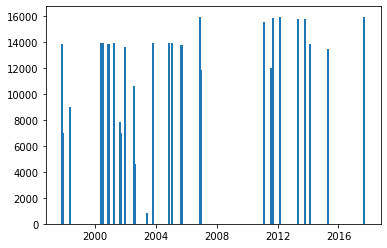

In [20]:
nasa_50['end_frequency'] = nasa_50['end_frequency'].apply(lambda x: int(x))
nasa_50['start_frequency'] = nasa_50['start_frequency'].apply(lambda x: int(x))
nasa_50['diff'] = nasa_50['start_frequency'].sub(nasa_50['end_frequency'], axis=0)
# nasa_50
ax = plt.subplot()
ax.bar(nasa_50['start_datetime'],nasa_50['diff'], width=50)
ax.xaxis_date()
plt.show()

# graph = plt.plot_date(nasa_50['start_datetime'],nasa_50['start_frequency'])